In [2]:
! jt -t grade3 -nf opensans

/bin/sh: jt: command not found


<h1><center>1. Load Data</center></h1>



In [6]:
import os
import json
import warnings
import pandas as pd
import numpy as np

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
data = pd.read_csv('../synthesized-web/project_templates/templates/credit.csv')
print(data.shape)
data.head()

(9999, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,effort,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,"(0.00649, 0.04]",9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,"(0.000309, 0.00134]",2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,"(0.000309, 0.00134]",3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,"(0.000309, 0.00134]",3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,"(-0.001, 0.000309]",63588.0,7,0,1,0,0.0


In [4]:
from sklearn.model_selection import train_test_split
from synthesized import HighDimSynthesizer
from synthesized.common.values import CategoricalValue, ContinuousValue, NanValue
from synthesized.testing import UtilityTesting

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-3139-2D31-322D-B531
Expires at: 2019-12-31 00:00:00


In [5]:
train, test = train_test_split(data, test_size=0.2, random_state=0)
print(len(data), len(train), len(test))

9999 7999 2000






<h1><center>learning_rate=3e-4, decay_steps=1000, decay_rate=0.9</center></h1>

In [5]:
with HighDimSynthesizer(df=data, learning_rate=3e-4, decay_steps=1000, decay_rate=0.9) as synthesizer:
    synthesizer.learn(df_train=train, num_iterations=15000)
    synthesized = synthesizer.synthesize(num_rows=len(train))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
testing = UtilityTesting(synthesizer, train, test, synthesized)

Average distance: 0.05113336326131676
Max distance: 0.1975


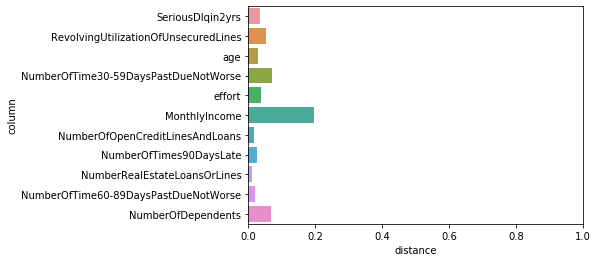

In [7]:
testing.show_distribution_distances()

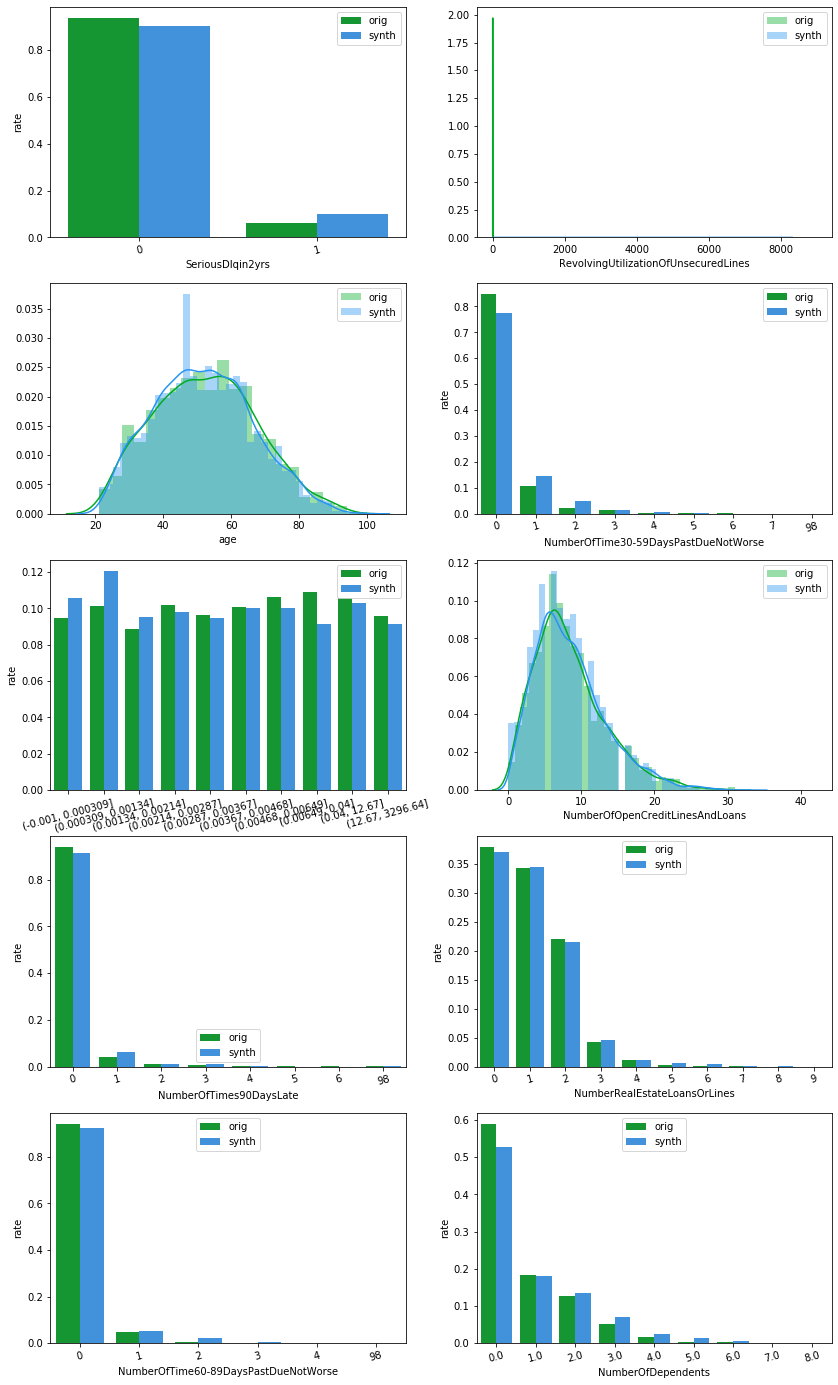

In [8]:
testing.show_distributions()

Average distance: 0.03937844969013545
Max distance: 0.26224338927989677


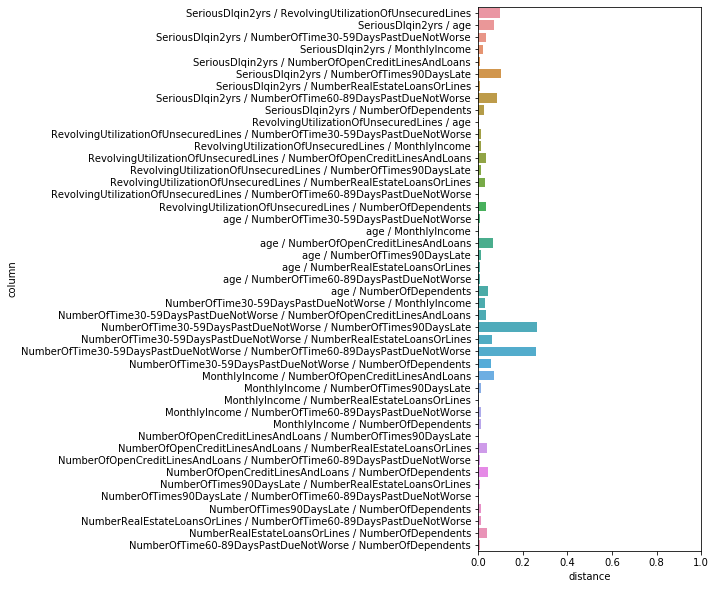

In [9]:
testing.show_corr_distances()

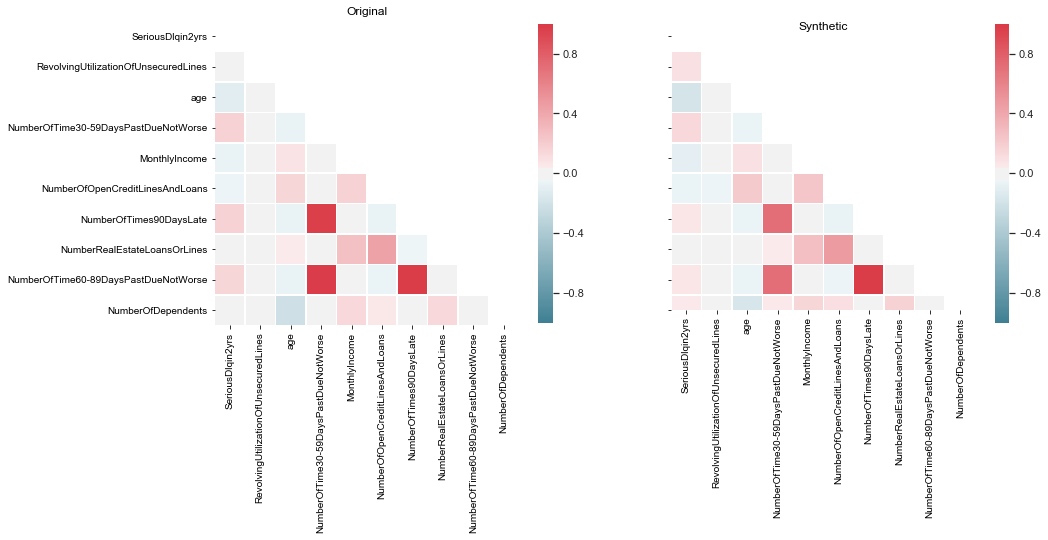

In [10]:
testing.show_corr_matrices()





<h1><center>learning_rate=1e-3, decay_steps=1000, decay_rate=0.9</center></h1>

In [11]:
with HighDimSynthesizer(df=data, learning_rate=1e-3, decay_steps=1000, decay_rate=0.9) as synthesizer:
    synthesizer.learn(df_train=train, num_iterations=15000)
    synthesized = synthesizer.synthesize(num_rows=len(train))


In [12]:
testing = UtilityTesting(synthesizer, train, test, synthesized)

Average distance: 0.0547541454045392
Max distance: 0.2216090761345168


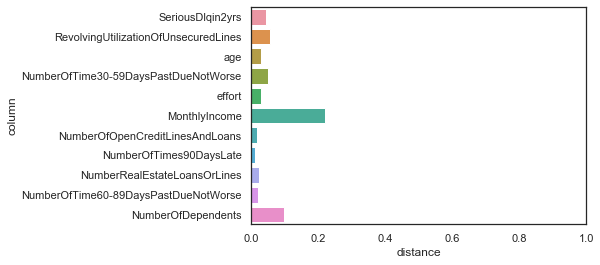

In [13]:
testing.show_distribution_distances()

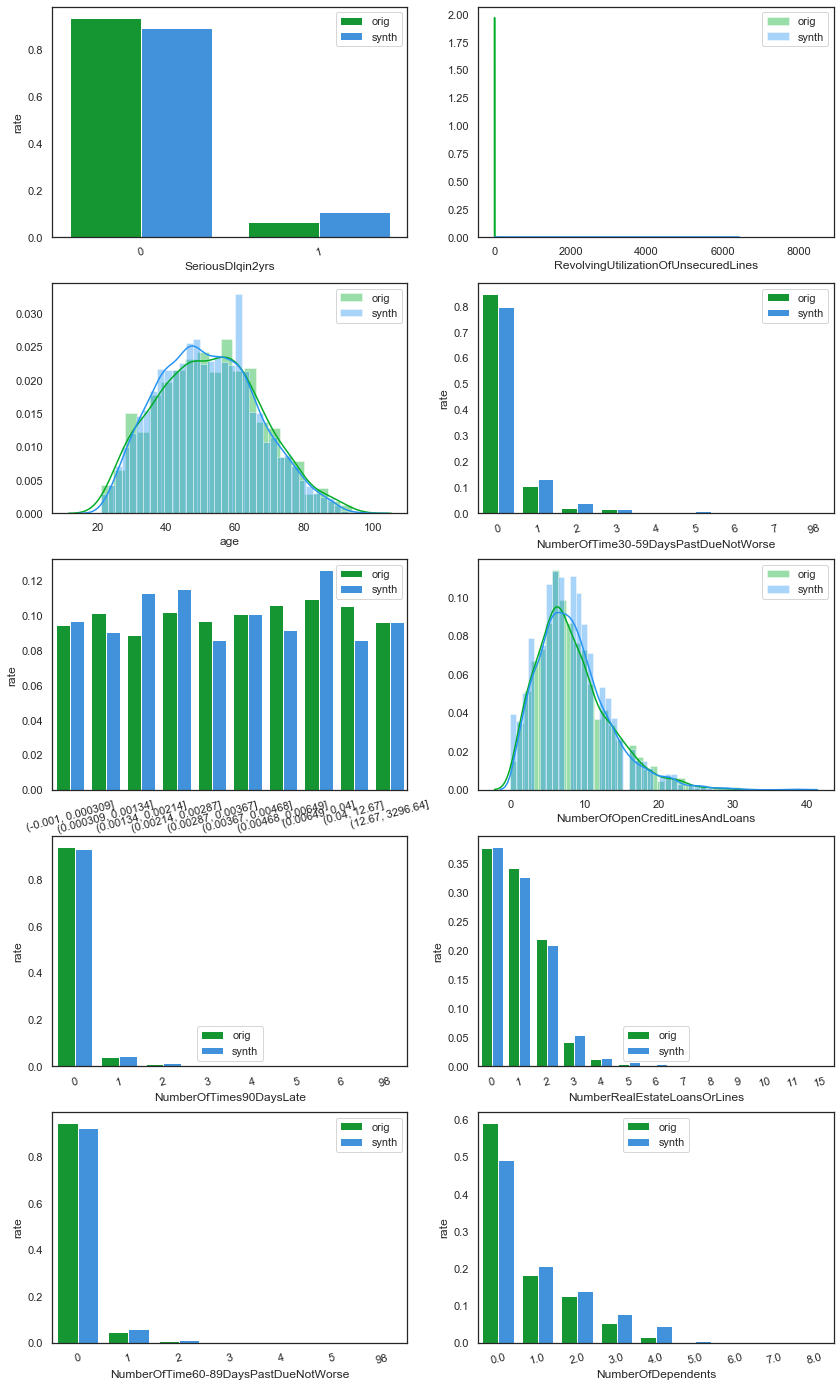

In [14]:
testing.show_distributions()

Average distance: 0.03322896456924939
Max distance: 0.1325246310056747


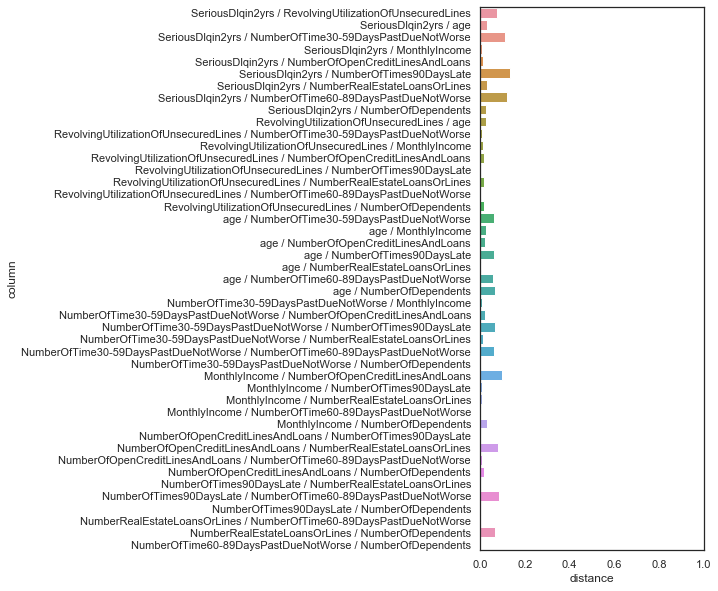

In [15]:
testing.show_corr_distances()

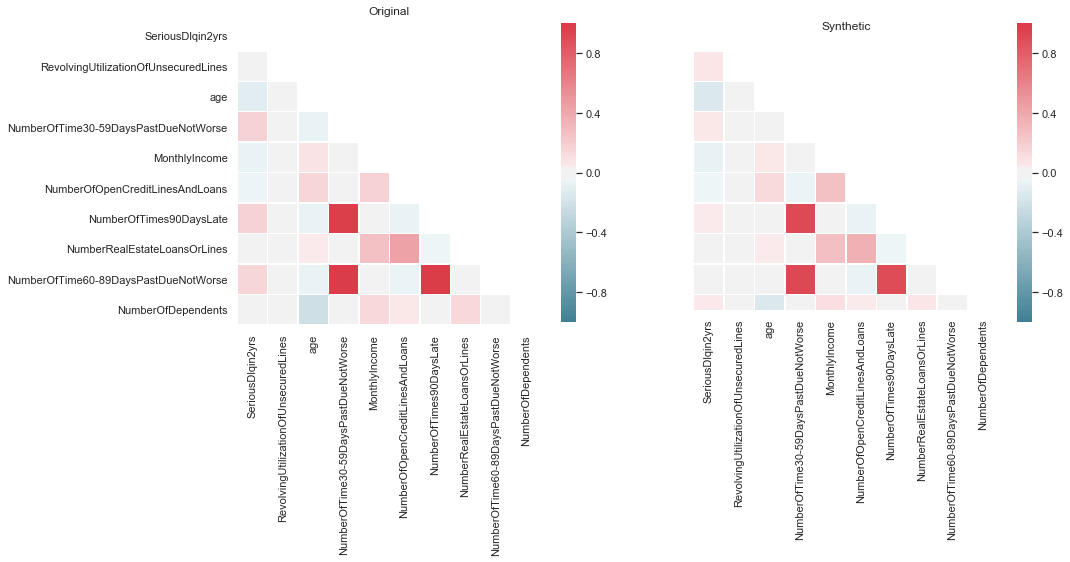

In [16]:
testing.show_corr_matrices()





<h1><center>learning_rate=3e-4, decay_steps=None, decay_rate=None</center></h1>

In [30]:
with HighDimSynthesizer(df=data, learning_rate=3e-4, decay_steps=None, decay_rate=None) as synthesizer:
    synthesizer.learn(df_train=data, num_iterations=15000)
    synthesized = synthesizer.synthesize(num_rows=len(data))


Time to preprocess: 39.36246085166931
Time to train: 18043.437664031982


KeyboardInterrupt: 

In [227]:
testing = UtilityTesting(synthesizer, train, test, synthesized)

Average distance: 0.0504071907190719
Max distance: 0.22248684868486848


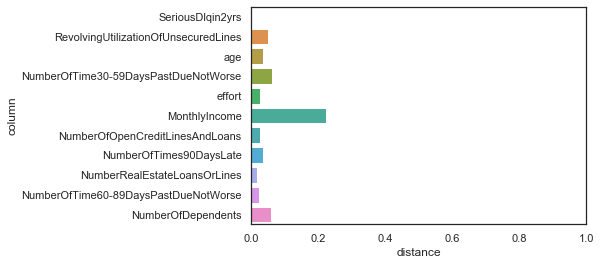

In [228]:
testing.show_distribution_distances()

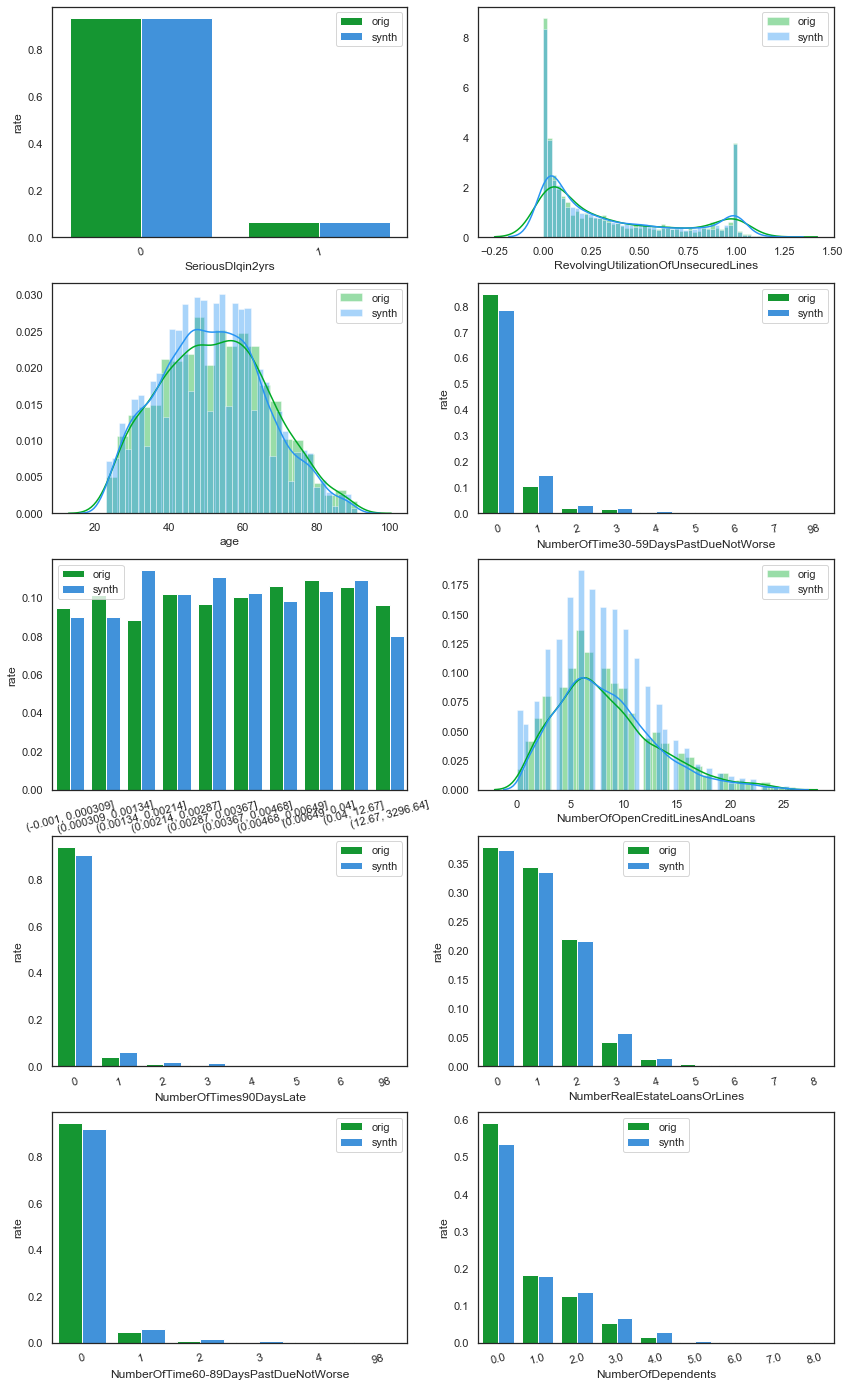

In [229]:
testing.show_distributions(remove_outliers=0.01)

Average distance: 0.042480297088578006
Max distance: 0.3955651918116668


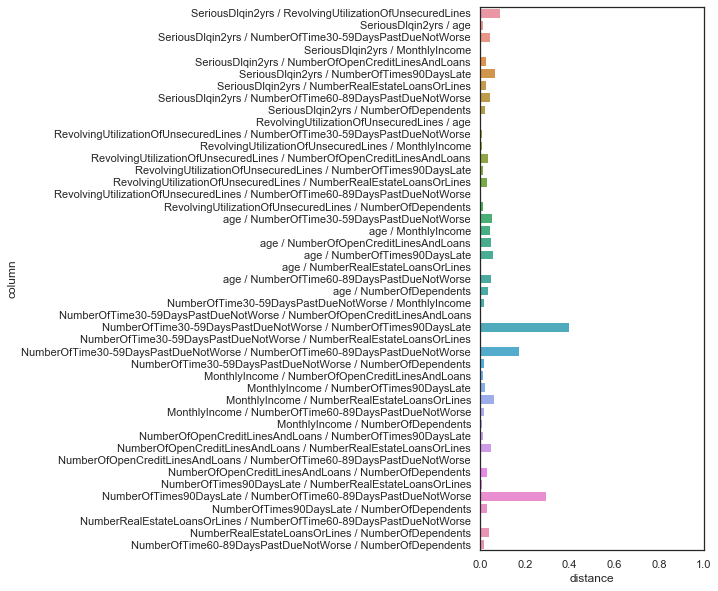

In [230]:
testing.show_corr_distances()

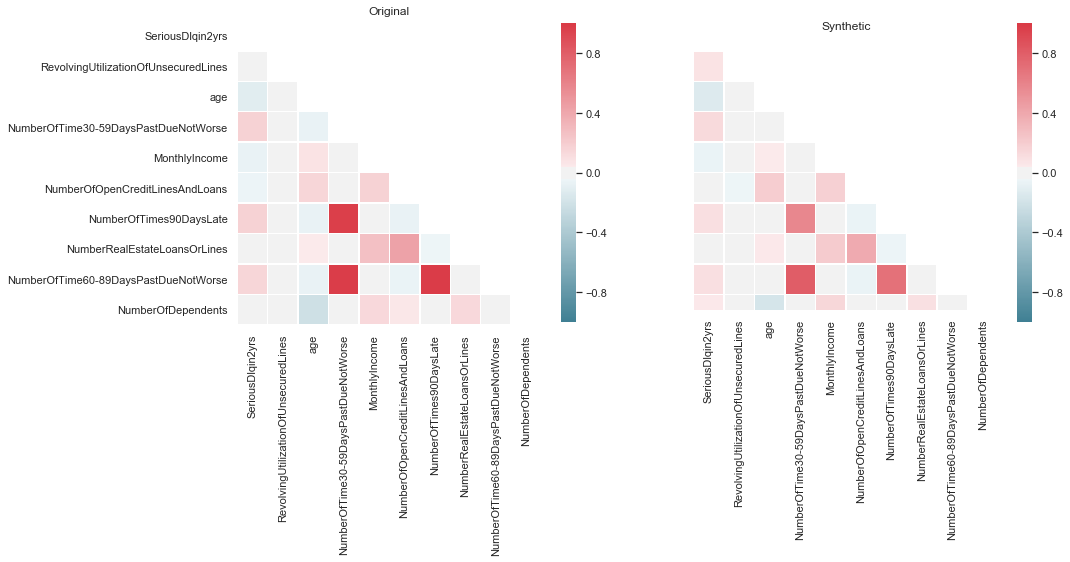

In [231]:
testing.show_corr_matrices()

In [281]:
synthesizer.values[0].similarity_regularization

0.1